# Restaurant Inventory Management EDA
## This notebook explores a restaurant inventory dataset to analyze stock, demand, wastage, and supplier performance. It uses Python libraries like **Pandas, NumPy, Matplotlib, and Seaborn**.


In [55]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# List of items (veg + non-veg)
items = [
    {"Item_Name": "Paneer", "Category": "Veg", "Subcategory": "Dairy", "Unit": "kg", "Price_per_Unit": 450},
    {"Item_Name": "Tomato", "Category": "Veg", "Subcategory": "Vegetable", "Unit": "kg", "Price_per_Unit": 40},
    {"Item_Name": "Onion", "Category": "Veg", "Subcategory": "Vegetable", "Unit": "kg", "Price_per_Unit": 35},
    {"Item_Name": "Chicken", "Category": "Non-Veg", "Subcategory": "Meat", "Unit": "kg", "Price_per_Unit": 250},
    {"Item_Name": "Mutton", "Category": "Non-Veg", "Subcategory": "Meat", "Unit": "kg", "Price_per_Unit": 600},
    {"Item_Name": "Rohu Fish", "Category": "Non-Veg", "Subcategory": "Fish", "Unit": "kg", "Price_per_Unit": 280},
    {"Item_Name": "Eggs", "Category": "Non-Veg", "Subcategory": "Poultry", "Unit": "pieces", "Price_per_Unit": 6},
    {"Item_Name": "Rice", "Category": "Veg", "Subcategory": "Grain", "Unit": "kg", "Price_per_Unit": 70},
    {"Item_Name": "Sugar", "Category": "Veg", "Subcategory": "Grocery", "Unit": "kg", "Price_per_Unit": 50},
    {"Item_Name": "Milk", "Category": "Veg", "Subcategory": "Dairy", "Unit": "liter", "Price_per_Unit": 50},
]

# Suppliers
suppliers = ["Supplier A", "Supplier B", "Supplier C"]

# Generate data for 100 days
start_date = datetime.today() - timedelta(days=100)
data = []

for day in range(100):
    date = start_date + timedelta(days=day)
    for idx, item in enumerate(items, start=1):
        daily_usage = np.random.randint(1, 10) if item["Unit"] != "kg" else round(np.random.uniform(0.5, 5), 2)
        current_stock = daily_usage + round(np.random.uniform(5, 20), 2)
        reorder_level = round(np.random.uniform(3, 10), 2)
        lead_time = np.random.randint(1, 5)
        waste_percentage = round(np.random.uniform(0, 5), 2)
        seasonal_factor = round(np.random.uniform(0.8, 1.5), 2)

        data.append({
            "Date": date.strftime("%Y-%m-%d"),
            "Item_ID": idx,
            "Item_Name": item["Item_Name"],
            "Category": item["Category"],
            "Subcategory": item["Subcategory"],
            "Unit": item["Unit"],
            "Current_Stock": current_stock,
            "Reorder_Level": reorder_level,
            "Daily_Usage": daily_usage,
            "Lead_Time": lead_time,
            "Price_per_Unit": item["Price_per_Unit"],
            "Supplier_Name": random.choice(suppliers),
            "Seasonal_Factor": seasonal_factor,
            "Waste_Percentage": waste_percentage
        })

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("restaurant_inventory_100days.csv", index=False)

print("Synthetic dataset created! Shape:", df.shape)
df.isnull().sum()
df.describe()
df.info()

df

Synthetic dataset created! Shape: (1000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Item_ID           1000 non-null   int64  
 2   Item_Name         1000 non-null   object 
 3   Category          1000 non-null   object 
 4   Subcategory       1000 non-null   object 
 5   Unit              1000 non-null   object 
 6   Current_Stock     1000 non-null   float64
 7   Reorder_Level     1000 non-null   float64
 8   Daily_Usage       1000 non-null   float64
 9   Lead_Time         1000 non-null   int64  
 10  Price_per_Unit    1000 non-null   int64  
 11  Supplier_Name     1000 non-null   object 
 12  Seasonal_Factor   1000 non-null   float64
 13  Waste_Percentage  1000 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 109.5+ KB


,Date,Item_ID,Item_Name,Category,Subcategory,Unit,Current_Stock,Reorder_Level,Daily_Usage,Lead_Time,Price_per_Unit,Supplier_Name,Seasonal_Factor,Waste_Percentage
0,2025-06-12,1,Paneer,Veg,Dairy,kg,21.45,8.12,2.19,1,450,Supplier A,1.11,2.98
1,2025-06-12,2,Tomato,Veg,Vegetable,kg,12.84,5.34,0.95,4,40,Supplier B,0.81,3.54
2,2025-06-12,3,Onion,Veg,Vegetable,kg,22.35,4.49,4.86,4,35,Supplier C,1.23,4.96
3,2025-06-12,4,Chicken,Non-Veg,Meat,kg,8.36,3.16,3.25,3,250,Supplier B,0.90,3.06
4,2025-06-12,5,Mutton,Non-Veg,Meat,kg,12.31,6.19,1.81,3,600,Supplier C,1.07,3.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-09-19,6,Rohu Fish,Non-Veg,Fish,kg,10.34,3.48,3.55,1,280,Supplier C,1.23,1.74
996,2025-09-19,7,Eggs,Non-Veg,Poultry,pieces,26.17,3.63,8.00,4,6,Supplier A,0.95,1.19
997,2025-09-19,8,Rice,Veg,Grain,kg,17.91,4.52,2.35,3,70,Supplier A,1.41,0.70
998,2025-09-19,9,Sugar,Veg,Grocery,kg,15.70,6.11,4.42,1,50,Supplier A,1.02,0.34


In [56]:
# creating a colums stock value and effective demand

df["stock_value"] = df["Current_Stock"]*df["Price_per_Unit"]

#effective demand
df["effective_demand"]=df["Daily_Usage"]*df["Seasonal_Factor"]

df

,Date,Item_ID,Item_Name,Category,Subcategory,Unit,Current_Stock,Reorder_Level,Daily_Usage,Lead_Time,Price_per_Unit,Supplier_Name,Seasonal_Factor,Waste_Percentage,stock_value,effective_demand
0,2025-06-12,1,Paneer,Veg,Dairy,kg,21.45,8.12,2.19,1,450,Supplier A,1.11,2.98,9652.50,2.4309
1,2025-06-12,2,Tomato,Veg,Vegetable,kg,12.84,5.34,0.95,4,40,Supplier B,0.81,3.54,513.60,0.7695
2,2025-06-12,3,Onion,Veg,Vegetable,kg,22.35,4.49,4.86,4,35,Supplier C,1.23,4.96,782.25,5.9778
3,2025-06-12,4,Chicken,Non-Veg,Meat,kg,8.36,3.16,3.25,3,250,Supplier B,0.90,3.06,2090.00,2.9250
4,2025-06-12,5,Mutton,Non-Veg,Meat,kg,12.31,6.19,1.81,3,600,Supplier C,1.07,3.09,7386.00,1.9367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-09-19,6,Rohu Fish,Non-Veg,Fish,kg,10.34,3.48,3.55,1,280,Supplier C,1.23,1.74,2895.20,4.3665
996,2025-09-19,7,Eggs,Non-Veg,Poultry,pieces,26.17,3.63,8.00,4,6,Supplier A,0.95,1.19,157.02,7.6000
997,2025-09-19,8,Rice,Veg,Grain,kg,17.91,4.52,2.35,3,70,Supplier A,1.41,0.70,1253.70,3.3135
998,2025-09-19,9,Sugar,Veg,Grocery,kg,15.70,6.11,4.42,1,50,Supplier A,1.02,0.34,785.00,4.5084


## Dataset Columns
- Date
- Item_ID
- Item_Name
- Category
- Subcategory
- Unit
- Current_Stock
- Reorder_Level
- Daily_Usage
- Lead_Time
- Price_per_Unit
- Supplier_Name
- Seasonal_Factor
- Waste_Percentage
- stock_value
- effective_demand


In [ ]:
# 1. Calculate average daily usage per item
avg_usage = df.groupby("Item_Name")["Daily_Usage"].mean()

highest_avg_item = avg_usage.sort_values(ascending=False).head(1)
print("Item with highest average daily usage:\n", highest_avg_item)


Item with highest average daily usage:
 Item_Name
Eggs    5.42
Name: Daily_Usage, dtype: float64


<Axes: xlabel='Item_Name', ylabel='Daily_Usage'>

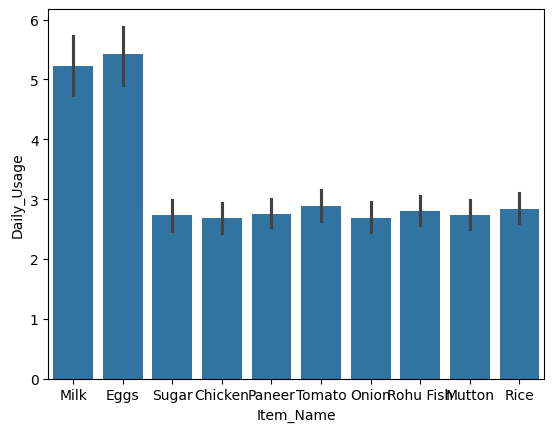

In [59]:

# plotting the top 5 average item usage

top5 = highest_avg
sns.barplot(data=top5,x="Item_Name",y="Daily_Usage")

In [63]:
# Which item has the highest current stockk
highest_current_stock = df.groupby("Item_Name")["Current_Stock"].mean().sort_values(ascending=False).head(1)
print(highest_current_stock)

Item_Name
Eggs    17.4125
Name: Current_Stock, dtype: float64


In [64]:
# Which category (Veg or Non-Veg) has more items?
df.groupby("Category")["Item_Name"].nunique()

Category
Non-Veg    4
Veg        6
Name: Item_Name, dtype: int64

In [65]:
# Which item has the highest Stock_Value?

df.groupby("Item_Name")["stock_value"].mean().sort_values(ascending=False).head(1)

Item_Name
Mutton    9249.54
Name: stock_value, dtype: float64

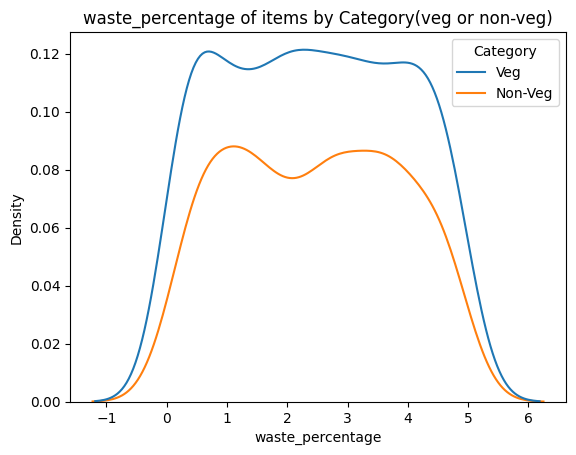

In [66]:
# df["Waste_Percentage"].describe()

sns.kdeplot(data=df,x="Waste_Percentage",hue="Category")
plt.title("waste_percentage of items by Category(veg or non-veg)")
plt.xlabel("waste_percentage")
plt.show()


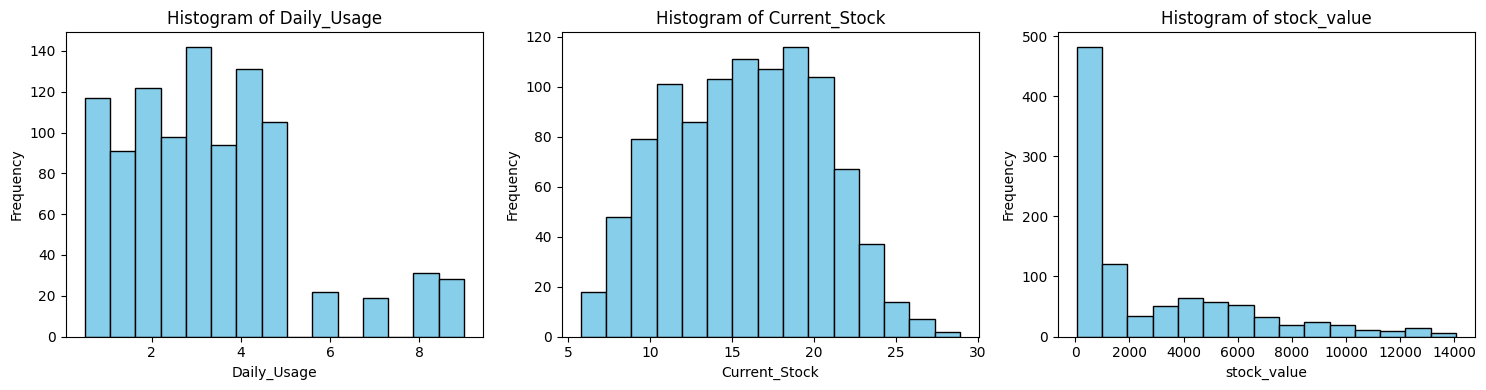

In [67]:

# Plot histograms for Daily_Usage, Current_Stock, Stock_Value.

columns = ["Daily_Usage","Current_Stock","stock_value"]

plt.figure(figsize=(15,4))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

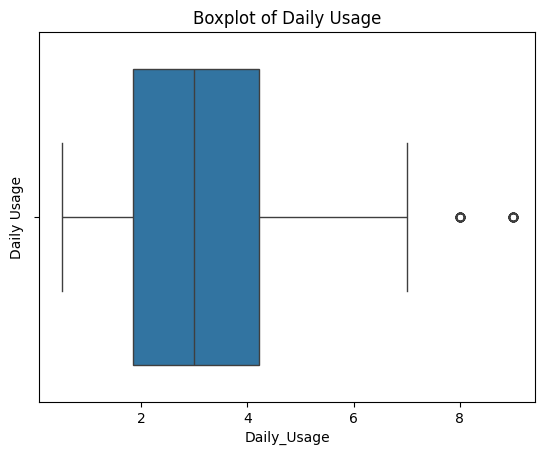

In [68]:
# Plot boxplots for Daily_Usage to detect outliers.

sns.boxplot(data=df,x="Daily_Usage")
plt.title("Boxplot of Daily Usage")
plt.ylabel("Daily Usage")
plt.show()

## bivariate analysis

In [69]:
# How does Current_Stock correlate with Daily_Usage?
corr = df["Current_Stock"].corr(df["Daily_Usage"])
print("correlation",corr)

# Value close to +1 → strong positive relation (higher stock, higher usage).

# Value close to -1 → strong negative relation (higher stock, lower usage).

# Around 0 → weak/no linear relationship.

correlation 0.36090982087101436


<Axes: xlabel='Current_Stock', ylabel='Daily_Usage'>

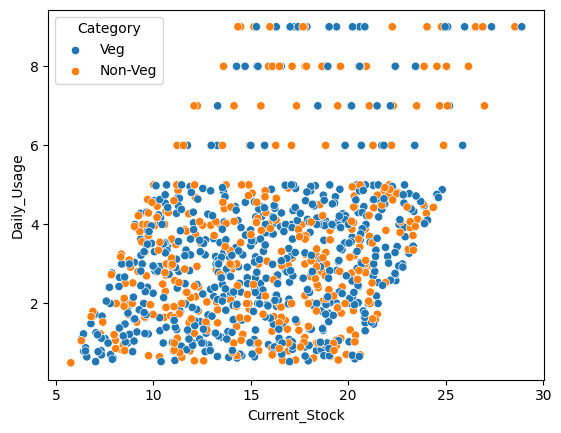

In [70]:
#plotting 
sns.scatterplot(data=df,x="Current_Stock",y="Daily_Usage",hue="Category")

<Axes: xlabel='Category', ylabel='Daily_Usage'>

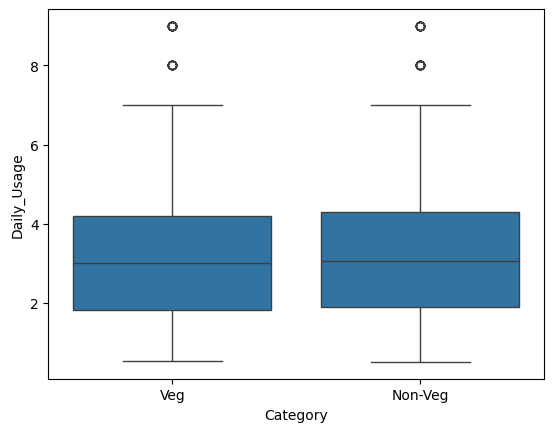

In [71]:
# Compare Daily_Usage across Category (Veg vs Non-Veg) using a boxplot.
plt.Figure(figsize=(10,5))
sns.boxplot(data=df,x="Category",y="Daily_Usage")

<Axes: xlabel='stock_value', ylabel='Subcategory'>

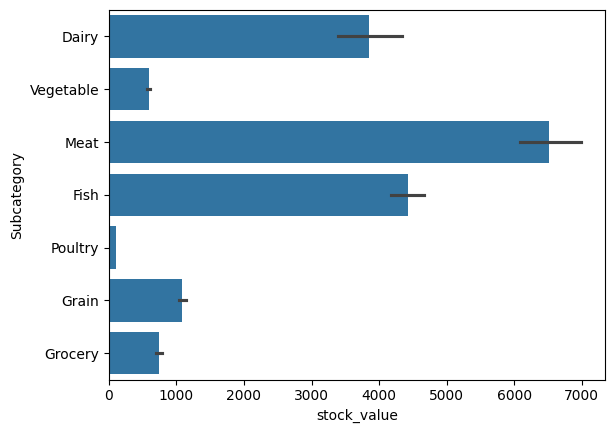

In [72]:
# compare stock values and subcategory
plt.Figure(figsize=(10,5))
sns.barplot(data=df,x="stock_value",y="Subcategory")


In [73]:
#supplier with most expensive items
df
highest_price_supplier = df.groupby("Supplier_Name")["Price_per_Unit"].mean().sort_values(ascending=False).head(1)
print(highest_price_supplier)

Supplier_Name
Supplier B    191.423676
Name: Price_per_Unit, dtype: float64


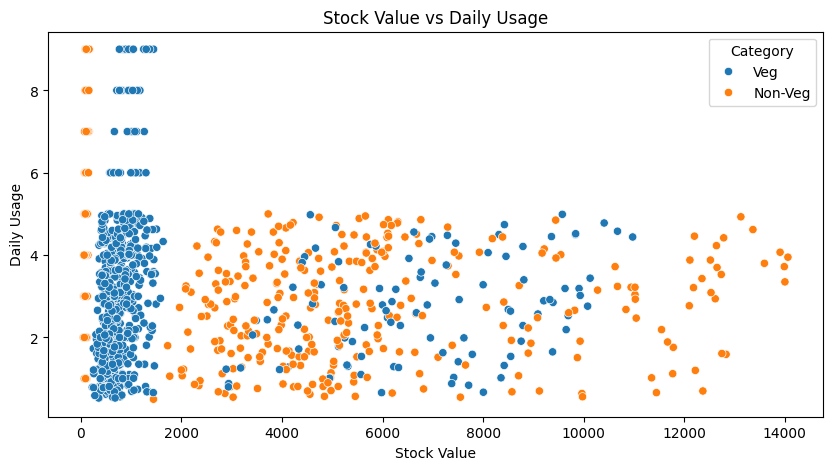

In [74]:
# stock values vs daily usage
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="stock_value",y="Daily_Usage",hue="Category")
plt.title("Stock Value vs Daily Usage")
plt.xlabel("Stock Value")
plt.ylabel("Daily Usage")
plt.show()

### multivariate analysis


In [76]:
# Which Category-Subcategory combination has the highest Stock_Value?
highest_stock_value = (
    df.groupby(["Category", "Subcategory"])["stock_value"]
      .sum()                              
      .sort_values(ascending=False)       
      .head(1)                            
)
print(highest_stock_value)



Category  Subcategory
Non-Veg   Meat           1304541.5
Name: stock_value, dtype: float64


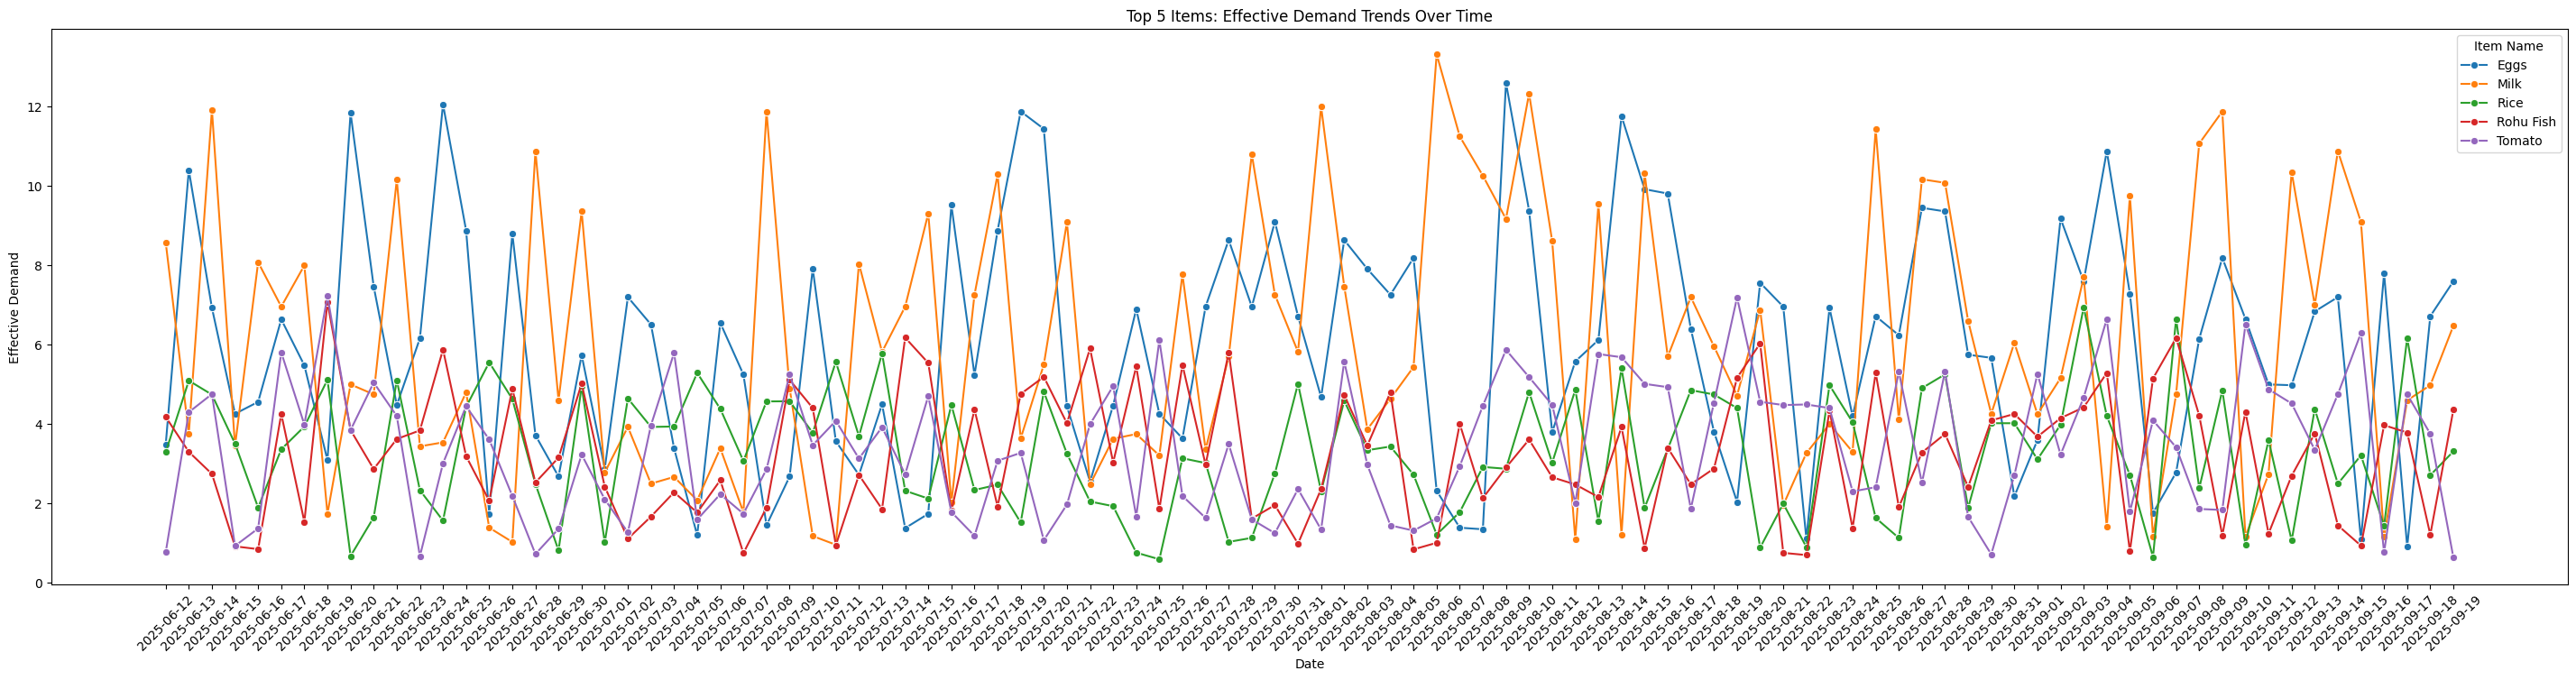

In [83]:
# analyze effective demand over date top 5 itsns detect seasonal spikes
daily_demand = df.groupby(["Date", "Item_Name"])["effective_demand"].sum().reset_index()

# 2. Find top 5 items overall by total demand
top_items = (
    daily_demand.groupby("Item_Name")["effective_demand"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# 3. Filter only top items
top_demand = daily_demand[daily_demand["Item_Name"].isin(top_items)]

# 4. Plot demand trends
plt.figure(figsize=(36,8))
sns.lineplot(data=top_demand, x="Date", y="effective_demand", hue="Item_Name", marker="o")
plt.title("Top 5 Items: Effective Demand Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Effective Demand")
plt.xticks(rotation=45)
plt.legend(title="Item Name")
plt.show()